# Example usage

This example usage showcases how to utilize the `pycricketpred` library in a project for cricket match prediction. 

We'll walk through each step with detailed explanations.

## Importing the Library and Submodules

In [89]:
import pycricketpred

#displays the current version of the library you're using.
print(pycricketpred.__version__)

0.1.0


In [90]:
# import specific functions from various submodules within pycricketpred:

#general data reading and manipulation tasks
from pycricketpred.data_wrangling import *  
#cleaning and preparing the cricket data.
from pycricketpred.data_cleaning import separate_columns,split_and_save_data 
# visualizations and plots for exploratory data analysis
from pycricketpred.eda import vis_bar,hist_chart
# building and training LogisticRegression models.
from pycricketpred.modelling import *


## Preprocessing the Cricket Data

In [91]:
# a sample dictionary containing cricket match data
data = {
    'game_id': ['1001349', '1001349', '1001350', '1001350', '1001351'],
    'season': ['2016/17', '2016/17', '2016/17', '2016/17', '2016/17'],
    'team': ['Australia', 'Australia', 'England', 'England', 'India'],
    'over': [0, 1, 0, 0, 1],
    'batter': ['AJ Finch', 'AJ Finch', 'JM Bairstow', 'JM Bairstow', 'V Kohli'],
    'batter_id': ['b8d490fd', 'b8d490fd', 'j4n5b78s', 'j4n5b78s', 'v7k3l9o2'],
    'bowler': ['SL Malinga', 'SL Malinga', 'C Woakes', 'C Woakes', 'JJ Bumrah'],
    'bowler_id': ['a12e1d51', 'a12e1d51', 'c7w4o2k5', 'c7w4o2k5', 'j5b2m3r4'],
    'non_striker': ['M Klinger', 'M Klinger', 'AD Hales', 'AD Hales', 'RG Sharma'],
    'non_striker_id': ['b970a03f', 'b970a03f', 'a1d4h89e', 'a1d4h89e', 'r8g3s5h2'],
    'wides': [0, 0, 1, 0, 1],
    'noballs': [0, 0, 1, 1, 0],
    'legbyes': [0, 1, 0, 0, 0],
    'byes': [1, 0, 0, 1, 1],
    'wicket': [0, 1, 0, 1, 0],
    'player_out': [None, None, None, None, None],
    'player_out_id': [None, None, None, None, None],
    'fielders_name': [None, None, None, None, None],
    'fielders_id': [None, None, None, None, None],
    'wicket_type': [None, None, None, None, None],
    'runs_batter': [0, 1, 0, 0, 0],
    'runs_extras': [1, 1, 0, 0, 1],
    'runs_total': [0, 0, 0, 1, 0],
}

# Creating the DataFrame for example demo
data_example = pd.DataFrame(data)
data_example.shape

(5, 23)

#### add extra 5 columns needed for the analysis

Extra columns added are: 
- team_over (which over is being played which team: str),
- over_ball (which ball of the over is it: str), 
- inning (which innings (1st or 2nd): int), 
- runs_cumulative (runs scored so far in the inning: int), 
- powerplay (is it a powerplay or not: int)

In [92]:
data_example = add_columns(data_example)
data_example

,game_id,season,team,over,batter,batter_id,bowler,bowler_id,non_striker,non_striker_id,...,fielders_id,wicket_type,runs_batter,runs_extras,runs_total,team_over,over_ball,inning,runs_cumulative,powerplay
0,1001349,2016/17,Australia,0,AJ Finch,b8d490fd,SL Malinga,a12e1d51,M Klinger,b970a03f,...,None,None,0,1,0,Australia_0,1,1,0,1
1,1001349,2016/17,Australia,1,AJ Finch,b8d490fd,SL Malinga,a12e1d51,M Klinger,b970a03f,...,None,None,1,1,0,Australia_1,1,1,0,1
2,1001350,2016/17,England,0,JM Bairstow,j4n5b78s,C Woakes,c7w4o2k5,AD Hales,a1d4h89e,...,None,None,0,0,0,England_0,1,2,0,1
3,1001350,2016/17,England,0,JM Bairstow,j4n5b78s,C Woakes,c7w4o2k5,AD Hales,a1d4h89e,...,None,None,0,0,1,England_0,2,2,1,1
4,1001351,2016/17,India,1,V Kohli,v7k3l9o2,JJ Bumrah,j5b2m3r4,RG Sharma,r8g3s5h2,...,None,None,0,1,0,India_1,1,2,1,1


#### Splitting Data into Training and Testing Sets

In [93]:
#Drop the ‘wicket‘ column from the DataFrame and separate it as the target variable.
X_example , y_example  = separate_columns(data_example)

In [94]:
#Split the data into training and testing sets, and save the training data to a CSV file.
X_train_example, X_test_example, y_train_example, y_test_example , full_train_example =split_and_save_data(X_example , 
                                                                                                           y_example,
                                                                                                           save_table_path = '../data_example')

## Data Visualization for Exploration

Use the vis_bar function to create bar charts for different features (this example looks into "over", "batter", and "season")

In [95]:
over = vis_bar(data_example, "over", 150, 150)
over

alt.Chart(...)

In [96]:
batter = vis_bar(data_example, "batter", 150, 150)
batter

alt.Chart(...)

In [97]:
season	 = vis_bar(data_example, "season", 150, 150)
season	

alt.Chart(...)

### Creating Histograms for visulization

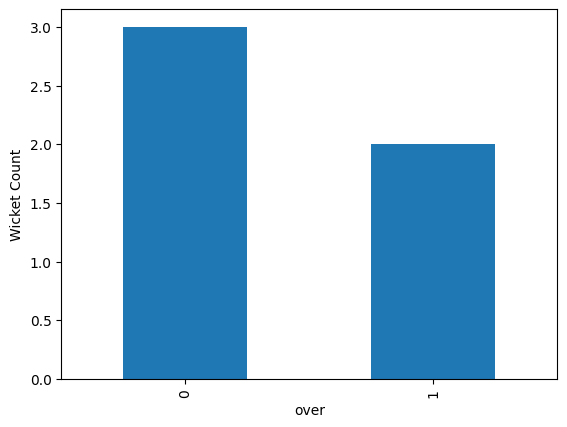

In [98]:
hist_chart(data_example, 'over', 'chart1.png', save_path='../data_example')


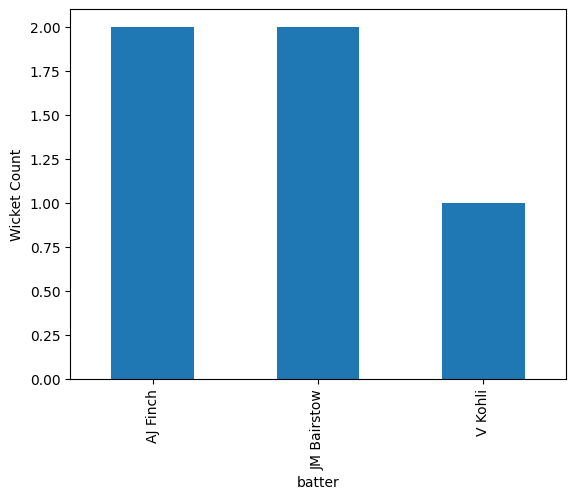

In [99]:
hist_chart(data_example, 'batter', 'chart2.png', save_path = '../data_example')


## Building, training and evaluate the Machine Learning models

In [100]:
# preprocessing performs one-hot encoding categorical features and feature scaling.
ohe, scaler = preprocessing()

# creates a combined transformer object for the coming training
ct = transformer(ohe, scaler)

#using the transformer object and data to build the  machine learning model 
final_pipe = build_final_model(ct, X_train_example, y_train_example)


Model Score: 0.0
Chart saved to: ../data_example


/Users/alexlin/miniconda3/envs/pycricketpred/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:182: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/alexlin/miniconda3/envs/pycricketpred/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:182: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(0.0,
 array([[0, 1],
        [1, 0]]),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1601c0d60>)

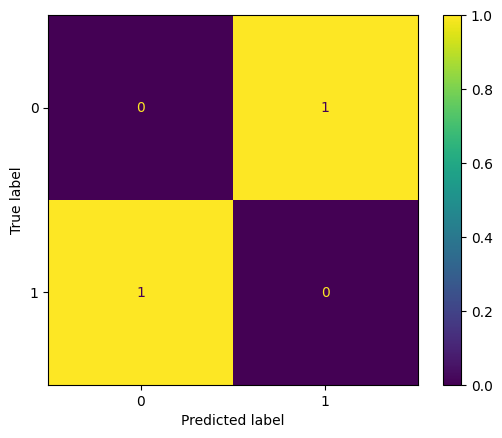

In [101]:
# assesses the performance of the model on the testing data
evaluate_model(final_pipe, X_test_example, y_test_example, save_image_path="../data_example")

## Overall Summary

The `pycricketpred` library offers a comprehensive toolkit for cricket match prediction tasks. This walkthrough demonstrated its functionalities for data wrangling, visualization, and building machine learning models.

By following the steps outlined and exploring the library's capabilities further, valuable insights would be gained from cricket data and develop effective prediction models. 

Remember that achieving optimal model performance often involves experimentation with different data preprocessing techniques and hyperparameter tuning.